## 0. Khai Báo thư viện

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Đọc ảnh và đưa về dạng trắng đen

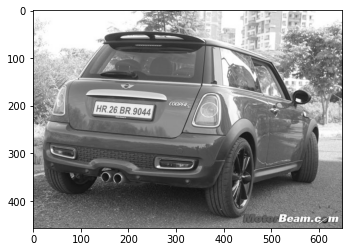

In [2]:
img = cv2.imread('images/image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply noise reduction filter 

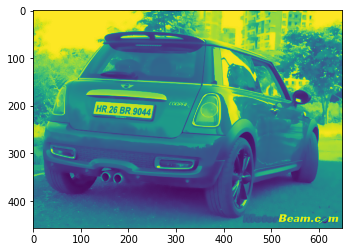

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
plt.imshow(bfilter)

## 3. Find edges for localization

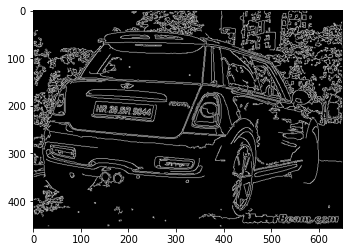

In [4]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 4. Find Contours and Apply Mask

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

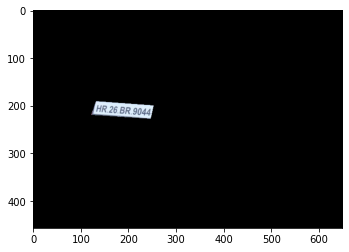

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

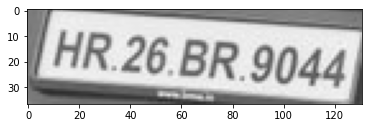

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

## 5. Render Result

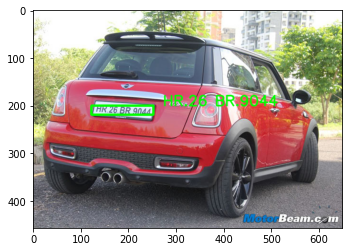

In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX

text = result[0][-2]
res = cv2.putText(img, text=text, org = (approx[2][0][0] + 20 , approx[2][0][1] ), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)

if len(result) == 2 :
    text2 = result[1][-2][0: 6]
    res = cv2.putText(img, text=text2, org = (approx[2][0][0] + 20 , approx[2][0][1] + 50 ), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)




res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))